In [49]:
import pandas as pd
import pymysql
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import matplotlib.ticker as ticker

1. Extracción de los Datos

In [2]:
# Primero cargamos el archivo con los datos demograficos por estado
df = pd.read_csv("data/modified.csv", delimiter = ';' ,on_bad_lines='skip')
# Observamos su estructura
df.head(5)

,Region,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Total:,331893760,5039877,732673,7276316,3025891,39237836,5812069,3605597,1003384,...,895376,6975218,29527940,3337975,645570,8642274,7738692,1782959,5895908,578803
1,Male:,164350700,2445896,383121,3629620,1493681,19618934,2943037,1768045,485908,...,451950,3413181,14739011,1694770,320293,4273931,3897320,887360,2955249,296007
2,M Under 5 years,9552445,149482,24610,203199,91430,1129355,158361,90173,27366,...,29295,202597,967416,121524,14046,245127,222442,45684,162402,15941
3,M 5 to 9 years,10284656,154786,25627,232179,103629,1210580,171525,98412,30336,...,31517,217844,1059471,137346,16659,262391,240844,49093,174157,17689
4,M 10 to 14 years,11155383,168349,27616,238758,103556,1356668,194453,110865,29397,...,32299,226632,1119382,142772,18586,292819,250892,57988,201375,21659


In [3]:
# Asignamos la columna Region como index
df.set_index('Region', inplace=True)
# Para luego transponer la tabla
df = df.transpose()
df.head(5)

Region,Total:,Male:,M Under 5 years,M 5 to 9 years,M 10 to 14 years,M 15 to 17 years,M 18 and 19 years,M 20 years,M 21 years,M 22 to 24 years,...,F 50 to 54 years,F 55 to 59 years,F 60 and 61 years,F 62 to 64 years,F 65 and 66 years,F 67 to 69 years,F 70 to 74 years,F 75 to 79 years,F 80 to 84 years,F 85 years and over
United States,331893760,164350700,9552445,10284656,11155383,6668042,4503114,2266660,2237052,6421318,...,10472757,10702465,4542997,6617129,4080082,5571798,8221808,5452475,3582418,3791691
Alabama,5039877,2445896,149482,154786,168349,97886,70364,38216,32896,90846,...,160616,168799,71550,108815,65406,93405,131884,89173,62434,54274
Alaska,732673,383121,24610,25627,27616,15130,12751,5426,6997,14254,...,20121,20732,9501,13932,8749,11625,12018,8588,4196,3558
Arizona,7276316,3629620,203199,232179,238758,148878,98426,52218,50061,149541,...,215092,214006,90725,148202,87926,131766,196944,139023,83293,76595
Arkansas,3025891,1493681,91430,103629,103556,64563,42899,23946,23728,57527,...,90520,98381,41205,60622,36713,51638,79532,55048,33521,33428


In [4]:
# Liberamos la columna con el nombre de los estados y le cambiamos el nombre
df = df.reset_index()
df = df.rename(columns={'index':'State Name'})
df.head(5)

Region,State Name,Total:,Male:,M Under 5 years,M 5 to 9 years,M 10 to 14 years,M 15 to 17 years,M 18 and 19 years,M 20 years,M 21 years,...,F 50 to 54 years,F 55 to 59 years,F 60 and 61 years,F 62 to 64 years,F 65 and 66 years,F 67 to 69 years,F 70 to 74 years,F 75 to 79 years,F 80 to 84 years,F 85 years and over
0,United States,331893760,164350700,9552445,10284656,11155383,6668042,4503114,2266660,2237052,...,10472757,10702465,4542997,6617129,4080082,5571798,8221808,5452475,3582418,3791691
1,Alabama,5039877,2445896,149482,154786,168349,97886,70364,38216,32896,...,160616,168799,71550,108815,65406,93405,131884,89173,62434,54274
2,Alaska,732673,383121,24610,25627,27616,15130,12751,5426,6997,...,20121,20732,9501,13932,8749,11625,12018,8588,4196,3558
3,Arizona,7276316,3629620,203199,232179,238758,148878,98426,52218,50061,...,215092,214006,90725,148202,87926,131766,196944,139023,83293,76595
4,Arkansas,3025891,1493681,91430,103629,103556,64563,42899,23946,23728,...,90520,98381,41205,60622,36713,51638,79532,55048,33521,33428


In [5]:
# Cargamos un archivo con los codigos iso de cada estado 
df_iso = pd.read_csv('data/iso.csv', delimiter = ';')
df_iso = df_iso.rename(columns={'iso':'Id', 'state':'State Name'})
# y lo agregamos 
df_dem = df_iso.merge(df)
df_dem.head(5)

,Id,State Name,Total:,Male:,M Under 5 years,M 5 to 9 years,M 10 to 14 years,M 15 to 17 years,M 18 and 19 years,M 20 years,...,F 50 to 54 years,F 55 to 59 years,F 60 and 61 years,F 62 to 64 years,F 65 and 66 years,F 67 to 69 years,F 70 to 74 years,F 75 to 79 years,F 80 to 84 years,F 85 years and over
0,AL,Alabama,5039877,2445896,149482,154786,168349,97886,70364,38216,...,160616,168799,71550,108815,65406,93405,131884,89173,62434,54274
1,AK,Alaska,732673,383121,24610,25627,27616,15130,12751,5426,...,20121,20732,9501,13932,8749,11625,12018,8588,4196,3558
2,AZ,Arizona,7276316,3629620,203199,232179,238758,148878,98426,52218,...,215092,214006,90725,148202,87926,131766,196944,139023,83293,76595
3,AR,Arkansas,3025891,1493681,91430,103629,103556,64563,42899,23946,...,90520,98381,41205,60622,36713,51638,79532,55048,33521,33428
4,CA,California,39237836,19618934,1129355,1210580,1356668,795876,519127,264334,...,1239439,1227163,480351,703127,446927,584569,856620,575970,385582,422799


In [6]:
# Ahora cargamos los datos de poblacion sin seguro por estado

df_unin = pd.read_csv("data/aspe-uninsured-estimates-by-state.csv", delimiter = ';' ,on_bad_lines='skip',thousands=',')
df_unin = df_iso.merge(df_unin)
df_unin.head()

,Id,State Name,Total Non-Elderly Population (Excluding Undocumented),Uninsured Population (Excluding Undocumented),Percent Uninsured,HIU Income < 100% FPL,HIU Income 100-138% FPL,HIU Income 139-249% FPL,HIU Income 250-400% FPL,HIU Income 400% FPL,...,College Grad,No English Speaking Adults in HH,English Spoken in HH,Spanish Spoken in HH,Chinese Spoken in HH,Korean Spoken in HH,Vietnamese Spoken in HH,Tagalog Spoken in HH,Russian Spoken in HH,Other Language Spoken in HH
0,AL,Alabama,3986500,456100,11%,213000,48800,94700,59100,40400,...,37300,"10,000",442000,11600,600,200,**,**,**,"1,200"
1,AK,Alaska,629300,80300,13%,21100,8100,22100,17900,11000,...,10100,600,77600,1000,**,**,**,100,**,"1,300"
2,AZ,Arizona,5720700,698800,12%,220400,63200,196000,130000,89300,...,104800,"51,500",625400,57200,"1,500",300,"1,200",**,200,"12,900"
3,AR,Arkansas,2443900,257200,11%,88700,29500,79600,39800,19500,...,18900,"11,000",243700,10500,**,**,**,**,**,"2,900"
4,CA,California,32060700,2397600,7%,729900,196800,629300,447500,394000,...,403100,"340,000",1808400,451900,"32,700","23,700","14,100","10,100","3,900","52,900"


In [ ]:
# Cargamos los datos del Covid 19 desde una API

url = 'https://api.covidactnow.org/v2/states.timeseries.csv?apiKey=097d24796ec9425ca927df39cc304ae8'
df_co = pd.read_csv(url,delimiter = ',' ,on_bad_lines='skip')


In [ ]:
# Los almacenamos para prever fallas de conexion a la API 
df_co.to_csv('data/actual_covid_data.csv', sep=';')

In [10]:
# Cargamos los datos desde el archivo csv en caso que la API no responda
df_co = pd.read_csv('data/actual_covid_data.csv', delimiter = ';' ,on_bad_lines='skip')

In [11]:
# Obtenemos los datos completos mas actuales
# Esto se hace porque hay dias en los que no se tienen los datos de casos de todos los estados
i = -1 # Último dato 
mask = df_co['date']==df_co['date'].iloc[i]
while(df_co[mask][['actuals.cases']].isnull().sum()[0]>0): # Mientras haya datos faltantes...
    i=i-1 # ...vamos subiendo en el dataframe
    mask = df_co['date']==df_co['date'].iloc[i]
df_covid = df_co[mask] # y filtramos para quedarnos solo con los datos actualizados y completos
df_covid.head(5)

,Unnamed: 0,date,country,state,county,fips,lat,long,locationId,actuals.cases,...,actuals.hsaIcuBeds.capacity,actuals.hsaIcuBeds.currentUsageTotal,actuals.hsaIcuBeds.currentUsageCovid,metrics.bedsWithCovidPatientsRatio,hsaName,actuals.hospitalBeds.weeklyCovidAdmissions,actuals.hsaHospitalBeds.weeklyCovidAdmissions,metrics.weeklyCovidAdmissionsPer100k,communityLevels.cdcCommunityLevel,communityLevels.canCommunityLevel
862,862,2022-07-11,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,273653.0,...,NaN,NaN,NaN,0.040,NaN,89.0,NaN,12.2,NaN,2.0
1877,1877,2022-07-11,US,AL,NaN,1,NaN,NaN,iso1:us#iso2:us-al,1375694.0,...,NaN,NaN,NaN,0.054,NaN,737.0,NaN,15.0,NaN,2.0
2889,2889,2022-07-11,US,AR,NaN,5,NaN,NaN,iso1:us#iso2:us-ar,878058.0,...,NaN,NaN,NaN,0.050,NaN,406.0,NaN,13.5,NaN,2.0
3939,3939,2022-07-11,US,AZ,NaN,4,NaN,NaN,iso1:us#iso2:us-az,2144424.0,...,NaN,NaN,NaN,0.049,NaN,807.0,NaN,11.1,NaN,2.0
4990,4990,2022-07-11,US,CA,NaN,6,NaN,NaN,iso1:us#iso2:us-ca,10298129.0,...,NaN,NaN,NaN,0.076,NaN,5031.0,NaN,12.7,NaN,2.0


2. Transformación de los datos

Los datos recolectados corresponden a las características de cada estado por lo cual representan una tabla de dimensiones. Dicha tabla por si misma no representa una base de datos. En una aplicación mas compleja se contaria con una tabla de hecho como por ejemplo la de ventas de seguros. Sin embargo se puede almacenar en una base de datos MySQL donde luego se pueden almacenar el resto de las tablas dimensionales. Por ejemplo la tabla de clientes. Tabla de tipos de poliza. Etc. Aquellas que no varian con tanta frecuencia como la de ventas. Luego se establecerian las relaciones.

In [16]:
# Vamos a tomar de las tres tablas la informacion de interés 
df_d = df_dem[['Id', 'State Name', 'Total:', 'Male:', 'Female:']]
df_u = df_unin[['Id', 'Uninsured Population (Excluding Undocumented)', 'Age 19-34', 'Age 35-49', 'Age 50-64']]
df_c = df_covid[['state', 'actuals.cases']]
df_c = df_c.rename(columns={'state':'Id'})


In [ ]:
# Ahora unimos las columnas seleccionadas en un solo dataframe
# state features sf
df_sf = df_d.merge(df_u).merge(df_c)

In [35]:
#Guardamos los datos en formato csv para ingestarlos la BD con DBeaver
df_sf.to_csv('data/state_features.csv', sep=';', index=False)

3. Carga de los Datos

In [36]:
# Previamente se creo una base de datos MySQL (claro) desde la aplicación DBeaver

# nos conectamos con la base de datos
conexion = pymysql.connect(host="localhost", 
                           user="root", 
                           passwd="12345", 
                           database="claro")
cursor = conexion.cursor()

# Agregar nueva tabla 'State_Features' a la base de datos 'claro'
# Dbeaver Autogenera la columnas asi que solo crearemos primary key
State_Features = """CREATE TABLE State_Features(
Id CHAR(2),
PRIMARY KEY (Id))"""

cursor.execute(State_Features)
print("Se ha agregado la tabla 'State_Features' a la base de datos")

# Cerrar conexión
conexion.close()


Se ha agregado la tabla 'State_Features' a la base de datos


In [52]:
# Ahora podemos, sobre esta tabla, realizar algunas consultas MySQL
# Los 10 estados con mayor incidencia de covid, Ordenados por numero de personas 
# sin seguro
conexion = pymysql.connect(host="localhost", 
                           user="root", 
                           passwd="12345", 
                           database="claro")
cursor = conexion.cursor()

query = """SELECT `State Name` AS Estado, `Total:` AS Poblacion, `Male:` AS Hombres, 
		`Female:` AS Mujeres,  `Uninsured Population (Excluding Undocumented)` AS Personas_sin_seguro, 
		(`Age 19-34`+ `Age 35-49`+`Age 50-64` ) AS Edad_19_64, `actuals.cases` AS Casos_COVID
FROM State_Features 
ORDER BY `actuals.cases` DESC 
LIMIT 10; """

cursor.execute(query)
a = cursor.fetchall()
conexion.close()
pd.DataFrame(a)


,0,1,2,3,4,5,6
0,California,39237836,19618934,19618902,2397600,2072000,10298129.0
1,Texas,29527940,14739011,14788930,4534900,3610000,7185050.0
2,Florida,21781128,10714520,11066608,2519500,2207500,6587030.0
3,New York,19835912,9696573,10139340,840000,743100,5668334.0
4,Illinois,12671469,6264364,6407105,751100,634700,3481048.0
5,Pennsylvania,12964056,6399632,6564424,703200,585200,3025035.0
6,North Carolina,10551162,5149323,5401839,996400,871800,2889199.0
7,Ohio,11780017,5808575,5971442,755500,627400,2867291.0
8,Michigan,10050811,4976869,5073942,561200,487500,2619533.0
9,Georgia,10799566,5270144,5529422,1268500,1087900,2592728.0


4. Visualización

In [46]:
shapefile = gpd.read_file('data/Estados_Unidos_Estados.shp')
shapefile = shapefile.merge(df_c, left_on = 'STATE_ABBR', right_on='Id')
shapefile.head(5)

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,Id,actuals.cases
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA,1692527.0
1,Montana,30,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",MT,289730.0
2,Maine,23,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",ME,271596.0
3,North Dakota,38,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",ND,251876.0
4,South Dakota,46,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9...",SD,245705.0


<AxesSubplot:>

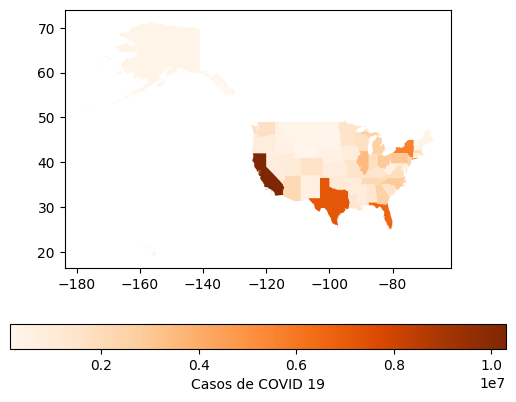

In [48]:
shapefile.plot(
            column = 'actuals.cases', 
            legend = True, 
            legend_kwds = {
              'label': "Casos de COVID 19",
              'orientation': "horizontal"
              },
            cmap = 'Oranges'
            )

TypeError: '<=' not supported between instances of 'list' and 'int'

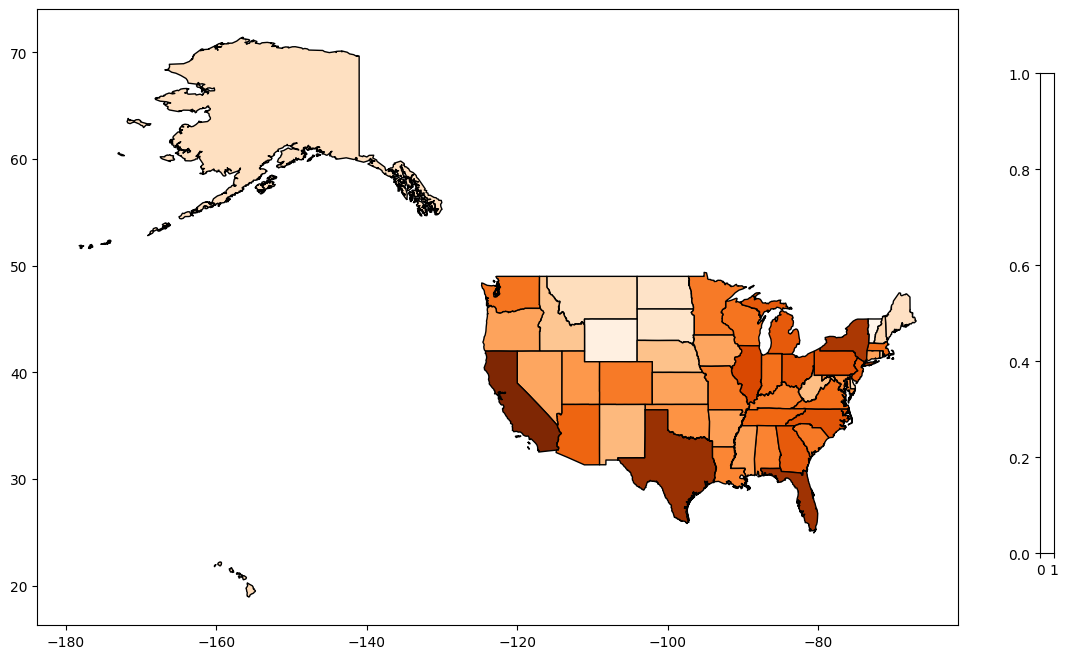

In [51]:

#creando una figura en matplotlib y ajustando el tamaño deseado 
fig , ax = plt.subplots(1 ,figsize = (14,8))



shapefile.plot(
  column = 'actuals.cases', 
  legend = False, 
  cmap ='Oranges',
  ax = ax,
  norm = mplc.LogNorm(), #utilizando el logaritmo de la variable
  linewidth = 1, #ajustando el grosor de las lineas del mapa
  edgecolor ='black' #color de las lineas del mapa
  )


vmin = shapefile['actuals.cases'].min()
vmax = shapefile['actuals.cases'].max()

#agregando barra de color atraves de matplotlib

#ajsutando posición y dimensiones de la barra
cax = fig.add_axes([0.9, 0.2, 0.01, 0.6]) 
#atributos de la barra de color
sm = plt.cm.ScalarMappable(
                      cmap = 'Oranges', 
                      norm = mplc.LogNorm(vmin = vmin, vmax = vmax)
                      )
sm._A = []

#OPCIONAL
#formateando los números a absultos de lo contrario salieran a base 10 
formatter = ticker.LogFormatter(10, labelOnlyBase=False) 
cbr = fig.colorbar(
                  sm, 
                  cax = cax, 
                  format = formatter,
                  ticks = [1,10,100]
                  )

ax.set_title('Casos COVID USA', fontsize = 25)

cbr.ax.tick_params(labelsize = 15) #tamaño de letra de las legendas

ax.axis('off') #desactivando los ejes de posicionamiento

plt.show()